$logloss = f(x) + g(x)$

$f(w) = \frac{1}{n}\sum\limits^{n}\ln{(1+e^{-y_k x_k^T w})}$

$g(w) = C ||w||^2_2$

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc("text", usetex=True)
import seaborn as sns
sns.set_context("talk")
figsize=(8, 6)
fontsize = 18

import numpy as np
import sklearn.datasets as skldata
import sklearn.preprocessing as skprep
import scipy.optimize as scopt
import sklearn.preprocessing as skprep
import scipy.special as scspec
from scipy.sparse import *
import math
from numpy import linalg as LA
import methods
from scipy.sparse import *

import imp
from methods import *
imp.reload(methods)

m = 64
n = 16192

X,Y = methods.create_data(m,n,filepath = 'ESOC.mat')
x0 = 10*np.random.rand(X.shape[1])

f_ = lambda w : f(w, X, Y)
f_grad_ = lambda w : f_gradient(w, X, Y)

logloss_ = lambda w : logloss(w, X, Y)
logloss_gradient_ = lambda w : logloss_gradient(w, X, Y)

#M = np.asarray([np.mean(z) for z in X.T])
#D = np.mean([LA.norm(x.toarray()-M, 2) for x in X])
#print(D)


/home/apxapa/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


X.shape = (327062, 37894) y.shape = (327062,) nonzero in X = (26951907,)


In [193]:
import imp
import methods
imp.reload(methods)
x0 = 10*np.random.rand(X.shape[1])

t_SPAG, x_SPAG, conv_SPAG = methods.SPAG(f, f_gradient, g, g_gradient, X, Y, C, x0, epochs = 4,solver = "my")
print("SPAG f*   = {}".format(min([f_(x) + g(x,C) for x in conv_SPAG])), "time: ", t_SPAG[-1])

t_SPAG2, x_SPAG2, conv_SPAG2 = methods.SPAG(f, f_gradient, g, g_gradient, X, Y, C, x0, epochs = 4)
print("SPAG f*   = {}".format(min([f_(x) + g(x,C) for x in conv_SPAG2])), "time: ", t_SPAG2[-1])

t_adSGDa, x_adSGDa, conv_adSGDa = methods.adapt_SGDac(logloss, logloss_gradient, X, Y, C, x0,D_0 = 0.03*0.3,
                                                      epochs = 1500)
print("adaptSGDa f*   = {}".format(min([f_(x) + g(x,C) for x in conv_adSGDa])), "time: ", t_adSGDa[-1])

t_fprsgd, x_fprsgd, conv_fprsgd = methods.prox_SGD(f,f_gradient,quad_prox, X, Y, C, x0,epochs = 20,alpha = 0.05,
                                         batch_size = 4096, accel=True)
print("fastProxSGD f* = {}".format(f_(x_fprsgd) + g(x_fprsgd,C)), "time: ", t_fprsgd[-1])

fastProxSGD f* = 6.98695295050825 time:  10.656347101001302
SPAG f*   = 0.696009754163308 time:  10.583341597000981


KeyboardInterrupt: 

In [3]:
import imp
import methods
imp.reload(methods)

t_SPAG, x_SPAG, conv_SPAG = {},{},{}
t_adSGDa, x_adSGDa, conv_adSGDa,t_fprsgd, x_fprsgd, conv_fprsgd = {},{},{},{},{},{}

for i in range(20):
    index = np.arange(np.shape(X)[0])
    np.random.shuffle(index)
    X = X[index, :]
    Y = Y[index]

    t_SPAG[i], x_SPAG[i], conv_SPAG[i] = methods.SPAG(f, f_gradient, g, g_gradient, X, Y, C, x0, epochs = 4,solver = "my")
    print("SPAG f*   = {}".format(f_(x_SPAG[i]) + g(x_SPAG[i],C)), "time: ", t_SPAG[i][-1])
    np.save(f't_SPAG{i}', t_SPAG[i])
    np.save(f'conv_SPAG{i}', conv_SPAG[i])
    del t_SPAG[i]
    del conv_SPAG[i]
#    t_SPAG2[i], x_SPAG2[i], conv_SPAG2[i] = methods.SPAG(f, f_gradient, g, g_gradient, X, Y, C, x0, epochs = 4)
#    print("SPAG2 f*   = {}".format(f_(x_SPAG2[i]) + g(x_SPAG2[i],C)), "time: ", t_SPAG2[i][-1])

    t_adSGDa[i], x_adSGDa[i], conv_adSGDa[i] = methods.adapt_SGDac(logloss, logloss_gradient, X, Y, C, x0,D_0 = 0.03*0.3,
                                                          epochs = 1500)
#    print("adaptSGDa f*   = {}".format(min([f_(x) + g(x,C) for x in conv_adSGDa[i]])), "time: ", t_adSGDa[i][-1])
    np.save(f't_adSGDa{i}', t_adSGDa[i])
    np.save(f'conv_adSGDa{i}', conv_adSGDa[i])
    del t_adSGDa[i]
    del conv_adSGDa[i]
    
    t_fprsgd[i], x_fprsgd[i], conv_fprsgd[i] = methods.prox_SGD(f,f_gradient,quad_prox, X, Y, C, x0,epochs = 20,alpha = 0.05,
                                         batch_size = 4096, accel=True)
    print("fastProxSGD f* = {}".format(f_(x_fprsgd[i]) + g(x_fprsgd[i],C)), "time: ", t_fprsgd[i][-1])
    np.save(f't_fprsgd{i}', t_fprsgd[i])
    np.save(f'conv_fprsgd{i}', conv_fprsgd[i])
    del t_fprsgd[i]
    del conv_fprsgd[i]
    

SPAG f*   = 0.6957191325284001 time:  10.222940282000081
fastProxSGD f* = 0.7009939768040326 time:  11.590489374000072
SPAG f*   = 0.6995312006830056 time:  9.02055873900008
fastProxSGD f* = 0.7009940090182473 time:  12.120771655999988
SPAG f*   = 0.6955234993725846 time:  8.924669049000158
fastProxSGD f* = 0.7009938271364989 time:  11.641514837000159
SPAG f*   = 0.6976349933470455 time:  6.89730499999996
fastProxSGD f* = 0.7009934552278554 time:  11.63896403800004
SPAG f*   = 0.696280987901748 time:  7.740234837999878
fastProxSGD f* = 0.7009937760353157 time:  11.561587749999944
SPAG f*   = 0.6959921769752079 time:  8.596753221999961
fastProxSGD f* = 0.7009936107399932 time:  11.553367564999917
SPAG f*   = 0.7133284419532692 time:  6.017197166999949
fastProxSGD f* = 0.7009938289898502 time:  11.33121151399996
SPAG f*   = 3.953283901033595 time:  13.682577588999948
fastProxSGD f* = 0.700993967073673 time:  11.429104407000068
SPAG f*   = 0.6969675078220038 time:  9.947305631000063
fastP

In [10]:
t_SPAG, x_SPAG, conv_SPAG = {},{},{}
t_adSGDa, x_adSGDa, conv_adSGDa, t_fprsgd, x_fprsgd, conv_fprsgd = {},{},{},{},{},{}

fun_SPAG, fun_adSGDa, fun_fprsgd = {},{},{}
tpoint_SPAG, tpoint_adSGDa, tpoint_fprsgd = {},{},{}

for i in range(20):
    t_SPAG = np.load(f't_SPAG{i}.npy')
    conv_SPAG = np.load(f'conv_SPAG{i}.npy')
    t_adSGDa = np.load(f't_adSGDa{i}.npy')
    conv_adSGDa = np.load(f'conv_adSGDa{i}.npy')
    t_fprsgd = np.load(f't_fprsgd{i}.npy')
    conv_fprsgd = np.load(f'conv_fprsgd{i}.npy')
    
    fun_SPAG[i] = np.asarray([f_(x) + g(x,C) for x in conv_SPAG])
    tpoint_SPAG[i] = t_SPAG
    fun_adSGDa[i] = np.asarray([f_(x) + g(x,C) for x in conv_adSGDa[::30]])
    tpoint_adSGDa[i] = t_adSGDa[::30]
    fun_fprsgd[i] = np.asarray([f_(x) + g(x,C) for x in conv_fprsgd[::100]])
    tpoint_fprsgd[i] = t_fprsgd[::100]
    
    del t_SPAG, conv_SPAG, t_adSGDa, conv_adSGDa, t_fprsgd, conv_fprsgd
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [14]:
def approx(t_list, f_list, t):
    ind_l = [i for i in range(len(t_list)) if t_list[i] <= t] 
    ind_r = [i for i in range(len(t_list)) if t_list[i] > t]
    if len(ind_l) == 0:
        return f_list[ind_r[0]]
    if len(ind_r) == 0:
        return f_list[ind_l[-1]]
    ind_l, ind_r = ind_l[-1], ind_r[0]
    t_l = t_list[ind_l]
    t_r = t_list[ind_r]
    f_l = f_list[ind_l]
    f_r = f_list[ind_r]
    return (t_r-t)/(t_r-t_l)*f_l + (t-t_l)/(t_r-t_l)*f_r

def averaging(t_dict, f_dict, t):
    res, std = 0, 0
    n = len(t_dict)
    for i in range(len(t_dict)):
        if i == 7 or i ==14: continue
        res += approx(t_dict[i], f_dict[i], t)
    res = res/n
    for i in range(len(t_dict)):
        if i == 7 or i ==14: continue
        std += (approx(t_dict[i], f_dict[i], t) - res)**2 / (n-1)
    return res, 2*np.sqrt(std)

In [15]:
t_points = np.linspace(0.00, 10.0, num=20)

f_gr_SPAG = np.asarray([averaging(tpoint_SPAG, fun_SPAG, t) for t in t_points]).T
f_gr_adSGDa = np.asarray([averaging(tpoint_adSGDa, fun_adSGDa, t) for t in t_points]).T
f_gr_fprsgd = np.asarray([averaging(tpoint_fprsgd, fun_fprsgd, t) for t in t_points]).T

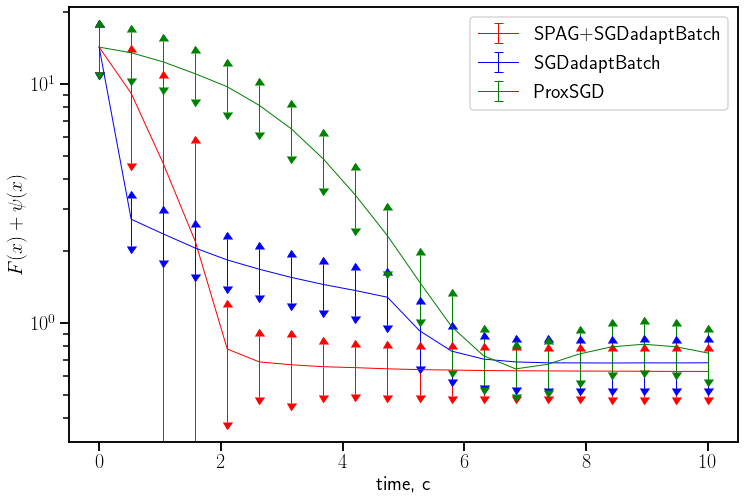

In [16]:
plt.figure(figsize=(12, 8))
fontsize=20

plt.errorbar(t_points, f_gr_SPAG[0], yerr = f_gr_SPAG[1], uplims=True, lolims=True, label="SPAG+SGDadaptBatch", linewidth = 1, color = 'r')
plt.errorbar(t_points, f_gr_adSGDa[0], yerr = f_gr_adSGDa[1], uplims=True, lolims=True, label="SGDadaptBatch", linewidth = 1, color = 'b')
plt.errorbar(t_points, f_gr_fprsgd[0], yerr = f_gr_fprsgd[1], uplims=True, lolims=True, label="ProxSGD", linewidth = 1, color = 'g')
        
plt.legend(fontsize=fontsize)
plt.xlabel(r"time, c", fontsize=fontsize)
plt.ylabel(r"$F(x) + \psi(x)$", fontsize=fontsize)
plt.xticks(fontsize=fontsize)
_ = plt.yticks(fontsize=fontsize)
plt.yscale("log")

plt.savefig('grafics.svg')

In [6]:
plt.figure(figsize=(12, 8))
fontsize=20

    
for i in range(len(conv_SPAG)):    
    if i == 0:
        plt.plot(tpoint_SPAG[i], fun_SPAG[i], label="SPAG+SGDadaptBatch", linewidth = 0.6, color = 'r')
        plt.plot(tpoint_adSGDa[i], fun_adSGDa[i], label="SGDadaptBatch", linewidth = 0.6, color = 'b')
        plt.plot(tpoint_fprsgd[i], fun_fprsgd[i], label="ProxSGD", linewidth = 0.6, color = 'g')
    else:
        plt.plot(tpoint_SPAG[i], fun_SPAG[i], linewidth = 0.6, color = 'r')
        plt.plot(tpoint_adSGDa[i], fun_adSGDa[i], linewidth = 0.6, color = 'b')
        plt.plot(tpoint_fprsgd[i], fun_fprsgd[i], linewidth = 0.6, color = 'g')
        
plt.legend(fontsize=fontsize)
plt.xlabel(r"time, c", fontsize=fontsize)
plt.ylabel(r"$F(x) + \psi(x)$", fontsize=fontsize)
plt.xticks(fontsize=fontsize)
_ = plt.yticks(fontsize=fontsize)
plt.yscale("log")

NameError: name 'conv_SPAG' is not defined

<Figure size 864x576 with 0 Axes>

In [24]:
np.where(fun_SPAG[0] < 0.706)[0][0]

2

In [53]:
i = 9
np.where(fun_adSGDa[i] < 0.761)[0]

array([31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
       48, 49, 50])

In [77]:
time_SPAG = np.asarray([t_SPAG[i][np.where(fun_SPAG[i] < 0.706)[0][0]] for i in [0,1,2,5,6,7,8]])
time_adSGDa = np.asarray([t_adSGDa[i][::30][np.where(fun_adSGDa[i] < 0.761)[0][0]] for i in list(range(10))])
time_fprsgd = np.asarray([t_fprsgd[i][::150][np.where(fun_fprsgd[i] < 0.708)[0][0]] for i in list(range(10))])



In [78]:
mean_SPAG = time_SPAG.mean()
mean_adSGDa = time_adSGDa.mean()
mean_fprsgd = time_fprsgd.mean()

In [79]:
std_SPAG = time_SPAG.std()
std_adSGDa = time_adSGDa.std()
std_fprsgd = time_fprsgd.std()

In [81]:
print(0.706, 0.761, 0.708)
print(mean_SPAG,mean_adSGDa,mean_fprsgd)
print(std_SPAG,std_adSGDa,std_fprsgd)

0.706 0.761 0.708
4.751020831428605 8.810901073900073 7.716385578799986
2.698083503038056 1.0621552384963218 0.7410423422242121
